In [1]:
from pycbrf import ExchangeRates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)

import seaborn as sns

# Обработка данных

In [2]:
df = pd.read_excel(r"data.xlsx", parse_dates=["Дата и время операции"])
df.rename(columns={'Код пнкта': 'Exchange', 'Дата и время операции': 'DateTime',"Код валюты": "Code", "Сумма":"Sum"}, inplace = True)
df.head()

,Exchange,DateTime,Code,Sum
0,6,2018-01-02 13:46:22,810,1761.25
1,6,2018-01-02 13:58:43,810,11272.00
2,6,2018-01-02 14:14:31,978,20.00
3,6,2018-01-02 16:42:58,978,15.00
4,6,2018-01-03 09:20:42,978,150.00


##  Преобразование кодов валют

In [3]:
names = ["RUR","EUR","USD","NOK","CHF","CNY","GBP","JPY","AUD","CAD","SEK","CZK","DKK"]

In [4]:
code_to_names = dict(zip(df["Code"].unique(),names))
code_to_names

{36: 'AUD',
 124: 'CAD',
 156: 'CNY',
 203: 'CZK',
 208: 'DKK',
 392: 'JPY',
 578: 'NOK',
 752: 'SEK',
 756: 'CHF',
 810: 'RUR',
 826: 'GBP',
 840: 'USD',
 978: 'EUR'}

In [5]:
df["Code"] = df["Code"].map(code_to_names)

## Исследование данных

In [6]:
df.sort_values(by="DateTime",inplace=True)

In [7]:
df = df.reset_index(drop=True)

In [8]:
df["Exchange"] = df["Exchange"].astype(str)

In [9]:
df.head(100)

,Exchange,DateTime,Code,Sum
0,24,2018-01-02 10:45:36.000,RUR,-5710.0
1,24,2018-01-02 10:45:36.000,USD,100.0
2,24,2018-01-02 10:45:37.000,RUR,30.0
3,22,2018-01-02 10:55:35.000,USD,200.0
4,22,2018-01-02 10:55:35.000,RUR,-11320.0
5,22,2018-01-02 10:55:36.000,RUR,30.0
6,22,2018-01-02 10:57:42.000,RUR,-3380.0
7,22,2018-01-02 10:57:42.000,EUR,50.0
8,22,2018-01-02 10:57:43.000,RUR,30.0
9,22,2018-01-02 11:07:02.000,USD,-100.0


In [10]:
df.tail()

,Exchange,DateTime,Code,Sum
288391,12,2018-12-31 21:21:21,RUR,-3365.0
288392,12,2018-12-31 21:21:22,RUR,30.0
288393,12,2018-12-31 21:23:04,USD,100.0
288394,12,2018-12-31 21:23:04,RUR,-6730.0
288395,12,2018-12-31 21:23:05,RUR,30.0


In [11]:
df.describe()

,Sum
count,2.883960e+05
mean,1.698797e+03
std,2.029946e+04
min,-6.200000e+05
25%,-1.000000e+02
50%,3.000000e+01
75%,3.000000e+02
max,1.530000e+06


In [12]:
df[df["Code"] == "DKK"]["Sum"].cumsum()

83790      100.0
100789     250.0
135974     800.0
170961    1800.0
183695   -4200.0
189687   -2700.0
228890    -700.0
233440    -400.0
238636    -250.0
Name: Sum, dtype: float64

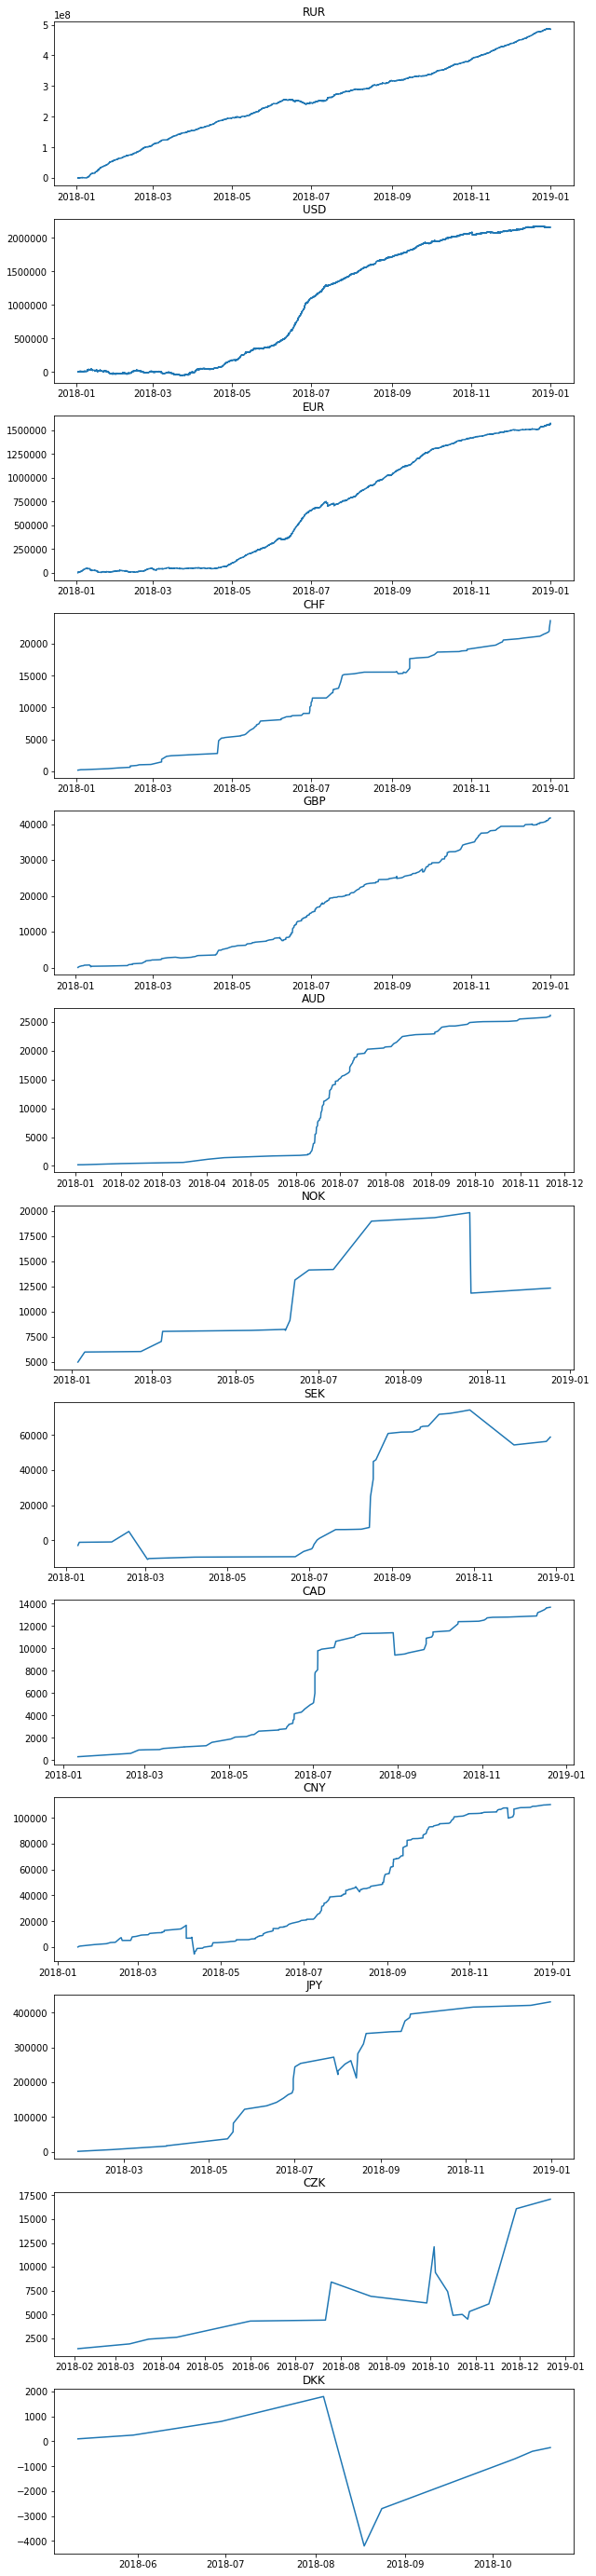

In [13]:
f = plt.figure(figsize=(10,50))
dfc = df.set_index('DateTime').copy()
for num,code in enumerate(dfc["Code"].unique()):
    
    ax = f.add_subplot(len(dfc["Code"].unique()),1,num+1)
    ax.plot(dfc[dfc["Code"] == code]["Sum"].cumsum())
    
    ax.set_title(code)

In [14]:
dfc.groupby(["Exchange","Code",pd.Grouper(freq='S')]).sum()

Sum
Exchange Code DateTime                     
10       RUR  2018-01-19 11:07:27  34494.00
              2018-01-19 11:07:28     30.00
              2018-01-19 11:12:04    510.84
              2018-01-19 12:58:55  91984.00
              2018-01-19 12:58:56     30.00
              2018-01-19 14:58:28    595.98
              2018-01-19 15:05:01  40243.00
              2018-01-19 15:05:02     30.00
              2018-01-19 15:12:04  20121.50
              2018-01-19 15:12:05     30.00
              2018-01-19 15:48:08    893.97
              2018-01-19 15:51:31  60364.50
              2018-01-19 15:51:32     30.00
              2018-01-19 17:00:29     85.14
              2018-01-19 17:06:19    681.12
              2018-01-19 17:09:43  51741.00
              2018-01-19 17:09:44     30.00
              2018-01-22 12:32:52  57490.00
              2018-01-22 12:32:53     30.00
              2018-01-22 12:33:27    848.84
              2018-01-22 12:37:58  63239.00
              2018-01-22 12:37:59     30.00
              2018-01-22 12:38:30    933.72
              2018-01-22 13:00:43  17247.00
              2018-01-22 13:00:44     30.00
              2018-01-22 13:01:05    169.77
              2018-01-22 13:16:03   -600.00
              2018-01-23 11:11:32  20300.00
              2018-01-23 17:12:26    424.70
              2018-01-23 17:54:16     42.47
...                                     ...
7        USD  2018-12-30 10:18:18    100.00
              2018-12-30 10:36:10    100.00
              2018-12-30 11:57:12    100.00
              2018-12-30 12:10:40  -1831.00
              2018-12-30 14:23:38   -100.00
              2018-12-30 14:30:18   -200.00
              2018-12-30 14:31:59    200.00
              2018-12-30 14:51:10   -700.00
              2018-12-30 14:53:26    700.00
              2018-12-30 15:47:31  -1800.00
              2018-12-30 15:57:49   1800.00
              2018-12-30 17:07:28  -1000.00
              2018-12-30 17:35:24   -423.00
              2018-12-30 17:37:30   -600.00
              2018-12-30 17:39:37  -1000.00
              2018-12-30 18:49:58   -350.00
              2018-12-31 10:28:08   -400.00
              2018-12-31 10:30:00   -550.00
              2018-12-31 10:45:38    200.00
              2018-12-31 11:12:37    800.00
              2018-12-31 11:15:40   -800.00
              2018-12-31 12:22:59  -1500.00
              2018-12-31 14:05:49   -900.00
              2018-12-31 14:08:45   -200.00
              2018-12-31 15:30:13    100.00
              2018-12-31 15:46:10    200.00
              2018-12-31 15:54:10   -200.00
              2018-12-31 16:29:23   -200.00
              2018-12-31 16:30:57    200.00
              2018-12-31 17:15:16    100.00

[284635 rows x 1 columns]

In [15]:
def has_pair(datetime,values):
    return True if values[datetime]==2 else False

In [16]:
def exactly_once(datetime,values):
    return True if values[datetime]==1 else False

In [17]:
df6 = df[df["Exchange"]=='25']
print(df6.shape)
df6.head()

(59212, 4)


,Exchange,DateTime,Code,Sum
14,25,2018-01-02 11:15:27,EUR,50.0
15,25,2018-01-02 11:15:27,RUR,-3390.0
16,25,2018-01-02 11:15:28,RUR,30.0
23,25,2018-01-02 11:26:16,USD,-1000.0
24,25,2018-01-02 11:26:16,RUR,58990.0


In [18]:
datetimes6 = df6["DateTime"].value_counts()

In [19]:
filtered6 = df6[(df6["Sum"] != 30) | (df6["Code"] != "RUR")]

In [20]:
filtered6rur = filtered6[(filtered6["Code"]=="RUR")].set_index('DateTime').copy().drop(["Exchange","Code"],axis = 1)

In [21]:
days = pd.to_datetime(df["DateTime"].dt.round("D").unique())
days

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=365, freq=None)

In [22]:
for i in range(len(days)-1):
    print(i,i+1)
    print(filtered6rur.loc[days[i]:days[i+1]].cumsum().min())

0 1
Sum   -500808.43
dtype: float64
1 2
Sum   -498505.87
dtype: float64
2 3
Sum   -415376.37
dtype: float64
3 4
Sum   -460689.21
dtype: float64
4 5
Sum   -496098.2
dtype: float64
5 6
Sum   -305766.3
dtype: float64
6 7
Sum   -282665.53
dtype: float64
7 8
Sum   -101439.98
dtype: float64
8 9
Sum   -32872.67
dtype: float64
9 10
Sum   -51125.36
dtype: float64
10 11
Sum    11578.0
dtype: float64
11 12
Sum   -56106.65
dtype: float64
12 13
Sum   -113255.62
dtype: float64
13 14
Sum   -19546.34
dtype: float64
14 15
Sum    5735.0
dtype: float64
15 16
Sum   -12704.5
dtype: float64
16 17
Sum   -47369.78
dtype: float64
17 18
Sum   -76440.22
dtype: float64
18 19
Sum   -125748.0
dtype: float64
19 20
Sum   -128844.28
dtype: float64
20 21
Sum    19580.6
dtype: float64
21 22
Sum   -83488.44
dtype: float64
22 23
Sum   -141056.74
dtype: float64
23 24
Sum   -45038.8
dtype: float64
24 25
Sum   -62624.38
dtype: float64
25 26
Sum   -17139.87
dtype: float64
26 27
Sum   -185147.37
dtype: float64
27 28
Sum   -911

Sum   -526475.76
dtype: float64
228 229
Sum   -683610.6
dtype: float64
229 230
Sum   -1127785.08
dtype: float64
230 231
Sum   -562146.82
dtype: float64
231 232
Sum   -926792.29
dtype: float64
232 233
Sum   -748145.46
dtype: float64
233 234
Sum   -406212.88
dtype: float64
234 235
Sum   -596794.45
dtype: float64
235 236
Sum   -758072.5
dtype: float64
236 237
Sum   -1016785.8
dtype: float64
237 238
Sum   -504979.49
dtype: float64
238 239
Sum   -583618.26
dtype: float64
239 240
Sum   -407170.17
dtype: float64
240 241
Sum   -316268.34
dtype: float64
241 242
Sum   -390994.85
dtype: float64
242 243
Sum   -664661.34
dtype: float64
243 244
Sum   -723419.6
dtype: float64
244 245
Sum   -260940.35
dtype: float64
245 246
Sum   -360175.51
dtype: float64
246 247
Sum   -458070.12
dtype: float64
247 248
Sum   -472652.27
dtype: float64
248 249
Sum   -590144.22
dtype: float64
249 250
Sum   -633983.64
dtype: float64
250 251
Sum   -1097066.45
dtype: float64
251 252
Sum   -439439.02
dtype: float64
252 253
S

In [23]:
def getcumsummin(arraylike):
    return arraylike.cumsum().min()

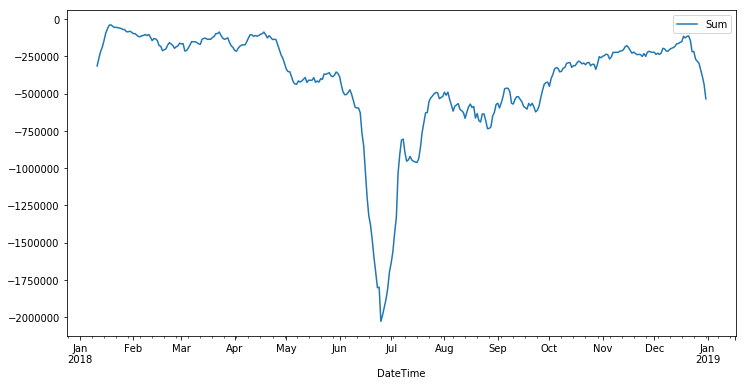

In [24]:
plt.rcParams['figure.figsize'] = (12,6)
filtered6rur.resample("D").apply(getcumsummin).dropna().rolling(10).mean().plot()

In [25]:
def min_day(df,exchange = None, code = None)-> 'Dataframe':
    
    if exchange not in df["Exchange"].unique():
        raise Exception()
    if code not in df["Code"].unique():
        raise Exception()
        
    curdf = df[df["Exchange"] == exchange].copy()
    curdf = curdf[(curdf["Sum"] != 30) | (curdf["Code"] != "RUR")]
    curdf = curdf[(curdf["Code"] == code)].set_index('DateTime').drop(["Exchange","Code"],axis = 1)
    
    return curdf.resample("D").apply(getcumsummin).fillna(0)

In [26]:
min_day(df, exchange='25',code = "USD")

,Sum
DateTime,
2018-01-02,-1000.0
2018-01-03,-163.0
2018-01-04,100.0
2018-01-05,300.0
2018-01-06,760.0
2018-01-07,-651.0
2018-01-08,200.0
2018-01-09,-1888.0
2018-01-10,-585.0


In [27]:
df["Exchange"].value_counts()

25    59212
12    52743
7     42159
22    31238
15    26794
20    25844
18    22613
24    13299
6      9766
23     4524
10      204
Name: Exchange, dtype: int64

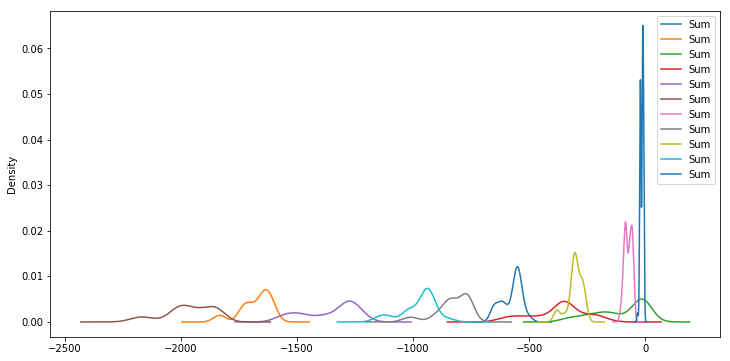

In [28]:
ds = []
for ex in df["Exchange"].unique():
    ds.append(min_day(df, exchange=ex,code = "USD").rolling(200).mean())
pd.concat(ds,axis = 1).plot(kind = 'kde')

In [29]:
min_day(df, exchange='10',code = "EUR")

,Sum
DateTime,


In [30]:
ds = []
for ex in df["Exchange"].unique():
    if ex not in ['6','10','23']:
        ds.append(min_day(df, exchange=ex,code = "EUR"))
dfc = pd.concat(ds,axis = 1).fillna(0)
dfc.head(10)

,Sum,Sum,Sum,Sum,Sum,Sum,Sum,Sum
DateTime,,,,,,,,
2018-01-02,680.0,-500.0,50.0,50.0,-795.0,-540.0,-450.0,0.0
2018-01-03,100.0,-1770.0,100.0,-915.0,70.0,-3650.0,-1400.0,0.0
2018-01-04,100.0,-220.0,150.0,100.0,-110.0,-450.0,-285.0,0.0
2018-01-05,200.0,-560.0,100.0,-550.0,-715.0,-320.0,100.0,150.0
2018-01-06,50.0,60.0,100.0,200.0,50.0,-290.0,500.0,0.0
2018-01-07,110.0,40.0,60.0,30.0,50.0,500.0,-710.0,0.0
2018-01-08,-40.0,5.0,50.0,100.0,5.0,50.0,-220.0,0.0
2018-01-09,50.0,-990.0,-375.0,80.0,-1200.0,-4450.0,-100.0,-110.0
2018-01-10,0.0,50.0,50.0,-2200.0,-210.0,-1000.0,980.0,-50.0


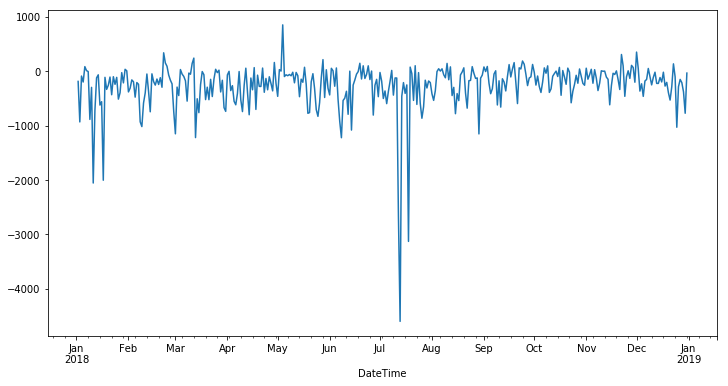

In [31]:
dfc.mean(axis = 1).plot()

## Графики минимальных авансов для валют

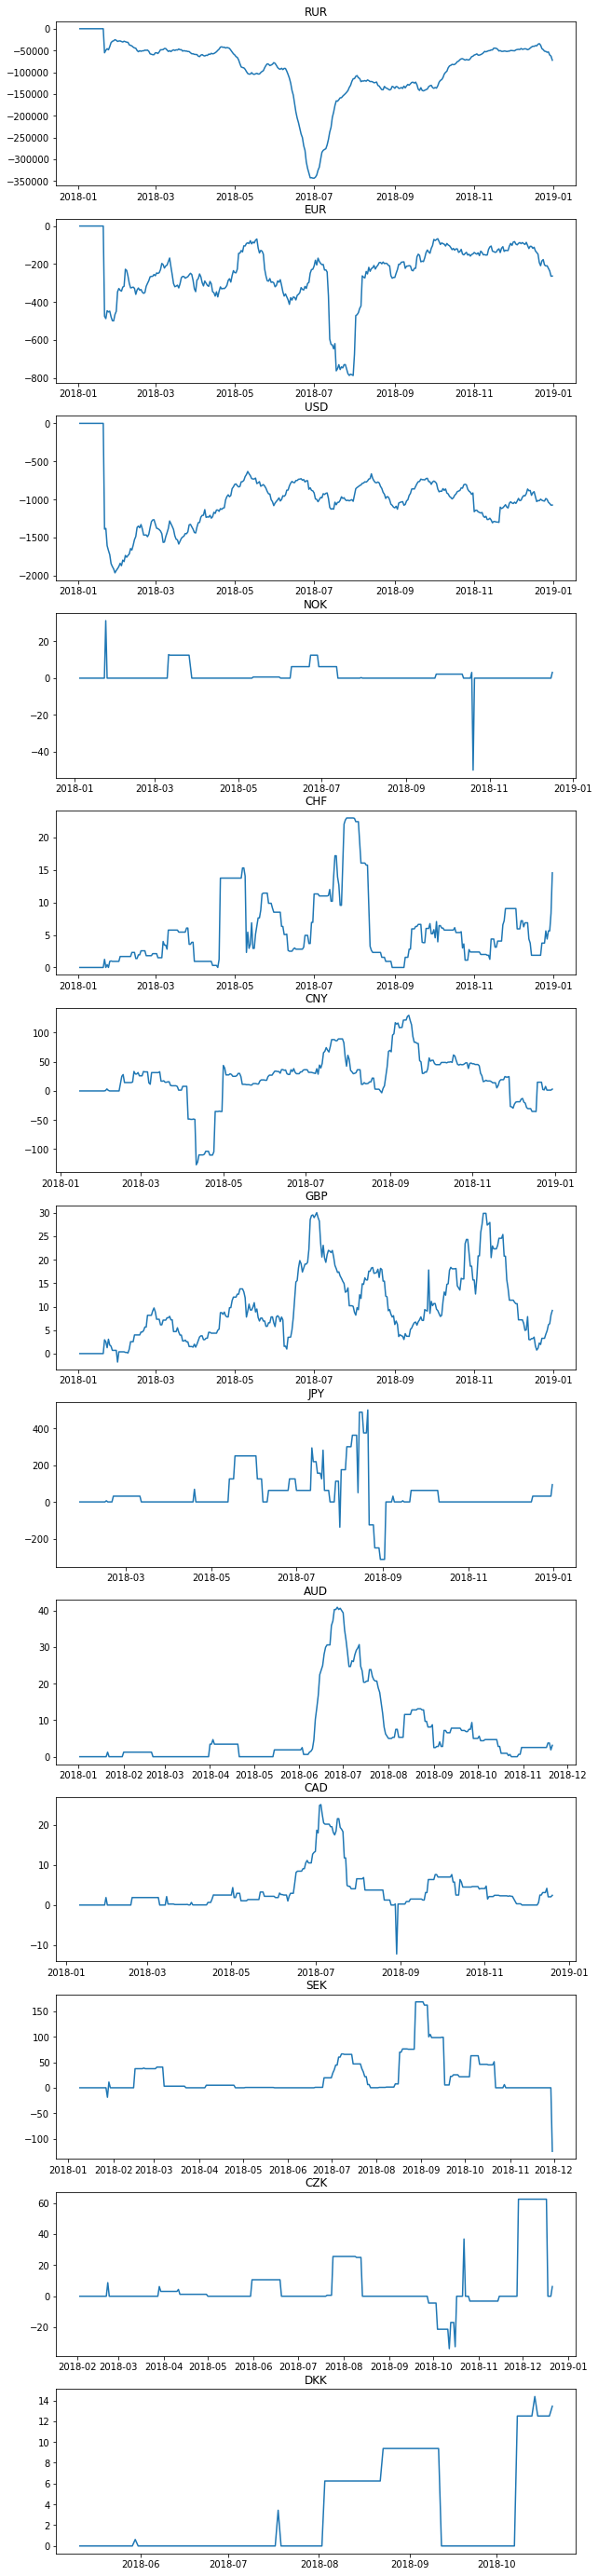

In [32]:
f = plt.figure(figsize=(10,50))
for num,code in enumerate(names):
    ds = []
    for ex in df["Exchange"].unique():
        if ex not in ['6','10','23']:
            ds.append(min_day(df, exchange=ex,code = code).rolling(20).mean())
    dfc = pd.concat(ds,axis = 1).fillna(0).mean(axis = 1)
    ax = f.add_subplot(len(names),1,num+1)
    ax.plot(dfc)
    ax.set_title(code)

In [33]:
min_day(df, exchange='25',code = 'RUR').to_csv('clean25rur.csv')

# Прогноз

In [34]:
import statsmodels.api as sm

In [35]:
min_rur_day25 = min_day(df, exchange='25',code = 'RUR').rolling(10).mean()[10:]
train = min_rur_day25[200:300]
min_rur_day25.tail(5)

,Sum
DateTime,
2018-12-27,-296004.541
2018-12-28,-341052.861
2018-12-29,-386662.761
2018-12-30,-440551.668
2018-12-31,-535378.854


In [36]:
model=sm.tsa.statespace.SARIMAX(train["Sum"], order=(0, 1, 0), seasonal_order=(2, 2, 2, 4), enforce_stationarity=False, enforce_invertibility=False).fit(disp=-1)

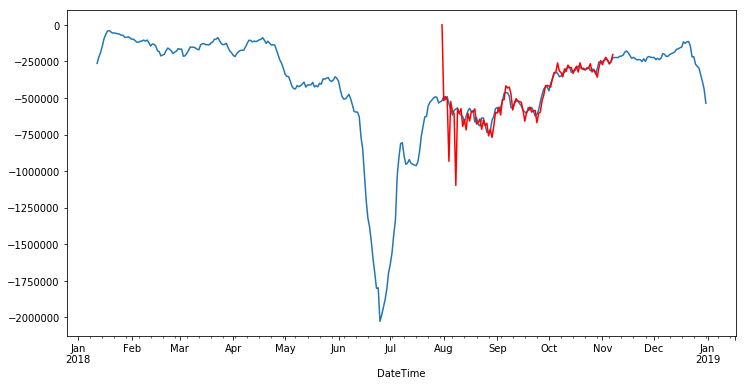

In [37]:
min_rur_day25['model'] = model.fittedvalues
min_rur_day25["Sum"].plot()
min_rur_day25['model'].plot(color='r')
plt.show()

In [38]:
min_rur_day25.shape

(354, 2)

In [39]:
datetime.strftime(min_rur_day25.iloc[st].name,"%Y-%m-%d")

NameError: name 'datetime' is not defined

2018-07-31    0.000000e+00
2018-08-01   -5.184441e+05
2018-08-02   -4.906106e+05
2018-08-03   -5.108066e+05
2018-08-04   -9.325103e+05
2018-08-05   -5.231295e+05
2018-08-06   -5.881468e+05
2018-08-07   -6.061022e+05
2018-08-08   -1.097489e+06
2018-08-09   -5.767768e+05
2018-08-10   -6.048085e+05
2018-08-11   -5.729057e+05
2018-08-12   -6.943452e+05
2018-08-13   -6.484459e+05
2018-08-14   -7.180441e+05
2018-08-15   -6.046927e+05
2018-08-16   -6.578358e+05
2018-08-17   -5.923627e+05
2018-08-18   -5.962946e+05
2018-08-19   -5.740680e+05
2018-08-20   -6.776553e+05
2018-08-21   -6.664326e+05
2018-08-22   -6.429798e+05
2018-08-23   -7.138153e+05
2018-08-24   -6.527287e+05
2018-08-25   -6.898275e+05
2018-08-26   -6.723227e+05
2018-08-27   -7.588653e+05
2018-08-28   -7.127355e+05
2018-08-29   -7.696596e+05
                  ...     
2018-11-19   -1.816614e+05
2018-11-20   -1.981505e+05
2018-11-21   -2.185183e+05
2018-11-22   -2.085137e+05
2018-11-23   -1.781813e+05
2018-11-24   -1.957951e+05
2

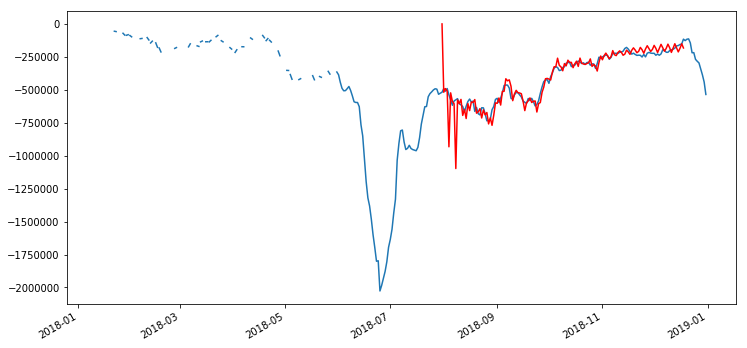

In [42]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

st = 0
length = 140
min_rur= min_rur_day25[['Sum']]

date_list = [datetime.strptime(datetime.strftime(min_rur_day25.iloc[st].name,"%Y-%m-%d"), "%Y-%m-%d") + relativedelta(days=x) for x in range(0,length)]


future = pd.DataFrame(index=date_list, columns= min_rur.columns)

min_rur = pd.concat([min_rur, future])
min_rur['forecast'] = model.predict(start=st, end=st+length)
print(model.predict(start=st, end=st+length))
min_rur["Sum"].plot()
min_rur['forecast'].plot(color = "r")
plt.show()


In [ ]:
min_rur_day25_1 = min_day(df, exchange='25',code = 'RUR').rolling(10).mean()[10:]
min_rur_day25_1.tail(5)

In [ ]:
min_rur_day25_1['model'] = model.fittedvalues
min_rur_day25_1["Sum"].plot()
min_rur_day25_1['model'].plot(color='r')
plt.show()

In [ ]:
model.fittedvalues[1]

In [ ]:
results = 

# Статистика

In [40]:
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4       -1.5906      0.086    -18.538      0.000      -1.759      -1.422
ar.S.L8       -0.6753      0.086     -7.890      0.000      -0.843      -0.508
ma.S.L4        0.1549      0.056      2.774      0.006       0.045       0.264
ma.S.L8       -0.6950      0.043    -16.015      0.000      -0.780      -0.610
sigma2      1.259e+09   2.04e-11   6.18e+19      0.000    1.26e+09    1.26e+09


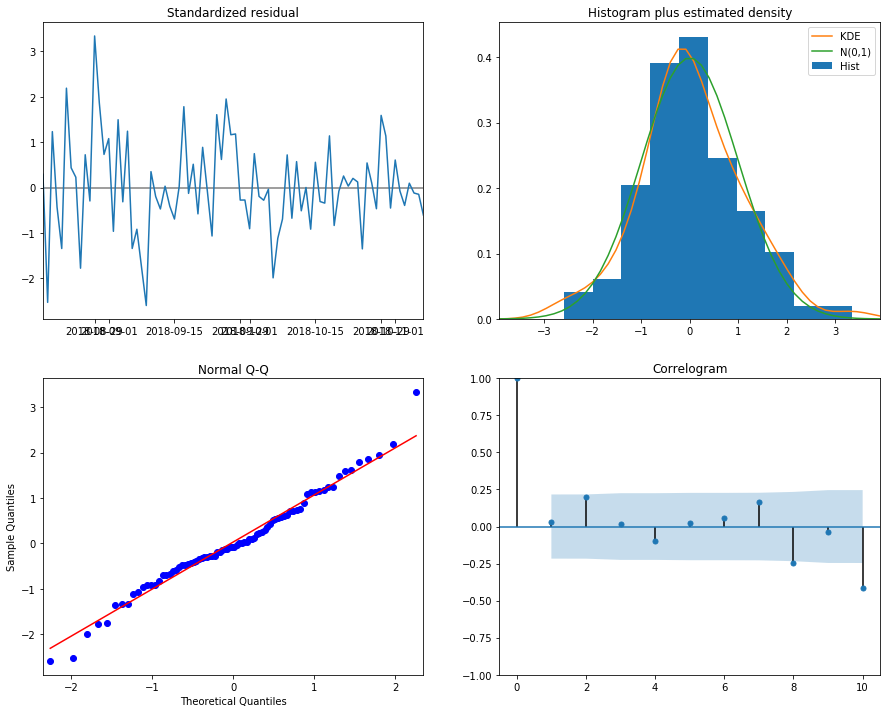

In [41]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [114]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 3)
# Сгенерируйте различные комбинации p, q и q
pdq = [(2, 2, 2) for x in range(12)]
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(2, 2, 2, x) for x in range(12)]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
#Examples of parameter combinations for Seasonal ARIMA....

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 2, 2) x (2, 2, 2, 1)
SARIMAX: (2, 2, 2) x (2, 2, 2, 2)
SARIMAX: (2, 2, 2) x (2, 2, 2, 3)
SARIMAX: (2, 2, 2) x (2, 2, 2, 4)


In [71]:
import warnings
import itertools

In [116]:
list(itertools.product(p, d, q));

In [115]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train["Sum"], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(2, 2, 2)x(2, 2, 2, 1)12 - AIC:2226.1716154737906
ARIMA(2, 2, 2)x(2, 2, 2, 2)12 - AIC:2144.2249580326556
ARIMA(2, 2, 2)x(2, 2, 2, 3)12 - AIC:2072.4037457142376
ARIMA(2, 2, 2)x(2, 2, 2, 4)12 - AIC:1972.9912636711638
ARIMA(2, 2, 2)x(2, 2, 2, 5)12 - AIC:1836.1207506824421
ARIMA(2, 2, 2)x(2, 2, 2, 6)12 - AIC:1743.2546170278008
ARIMA(2, 2, 2)x(2, 2, 2, 7)12 - AIC:1619.7308218200174
ARIMA(2, 2, 2)x(2, 2, 2, 8)12 - AIC:1546.8136662669385
ARIMA(2, 2, 2)x(2, 2, 2, 9)12 - AIC:1447.0439701648065
ARIMA(2, 2, 2)x(2, 2, 2, 10)12 - AIC:4683.127438145319
ARIMA(2, 2, 2)x(2, 2, 2, 11)12 - AIC:4517.771692862751
ARIMA(2, 2, 2)x(2, 2, 2, 1)12 - AIC:2226.1716154737906
ARIMA(2, 2, 2)x(2, 2, 2, 2)12 - AIC:2144.2249580326556
ARIMA(2, 2, 2)x(2, 2, 2, 3)12 - AIC:2072.4037457142376
ARIMA(2, 2, 2)x(2, 2, 2, 4)12 - AIC:1972.9912636711638
ARIMA(2, 2, 2)x(2, 2, 2, 5)12 - AIC:1836.1207506824421
ARIMA(2, 2, 2)x(2, 2, 2, 6)12 - AIC:1743.2546170278008
ARIMA(2, 2, 2)x(2, 2, 2, 7)12 - AIC:1619.7308218200174
ARIMA(2, 2

In [102]:
seasonal_pdq1 = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p, d, q))]

In [103]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq1:
        try:
            mod = sm.tsa.statespace.SARIMAX(train["Sum"], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3)12 - AIC:2879.1130093688807
ARIMA(0, 0, 0)x(0, 0, 1, 3)12 - AIC:2725.3976100148675
ARIMA(0, 0, 0)x(0, 1, 0, 3)12 - AIC:2382.3667949217424
ARIMA(0, 0, 0)x(0, 1, 1, 3)12 - AIC:2304.122821802196
ARIMA(0, 0, 0)x(1, 0, 0, 3)12 - AIC:2405.756156142344
ARIMA(0, 0, 0)x(1, 0, 1, 3)12 - AIC:2384.0151127246518
ARIMA(0, 0, 0)x(1, 1, 0, 3)12 - AIC:2330.4700188297466
ARIMA(0, 0, 0)x(1, 1, 1, 3)12 - AIC:2299.7463210991314
ARIMA(0, 0, 1)x(0, 0, 0, 3)12 - AIC:2780.9910575919794
ARIMA(0, 0, 1)x(0, 0, 1, 3)12 - AIC:2683.2640837786707
ARIMA(0, 0, 1)x(0, 1, 0, 3)12 - AIC:2313.7524226014607
ARIMA(0, 0, 1)x(0, 1, 1, 3)12 - AIC:2230.529436385864
ARIMA(0, 0, 1)x(1, 0, 0, 3)12 - AIC:2728.516306471847
ARIMA(0, 0, 1)x(1, 0, 1, 3)12 - AIC:2674.1505308167943
ARIMA(0, 0, 1)x(1, 1, 0, 3)12 - AIC:2273.7200275385476
ARIMA(0, 0, 1)x(1, 1, 1, 3)12 - AIC:2226.7928511858972
ARIMA(0, 1, 0)x(0, 0, 0, 3)12 - AIC:2298.5080003158896
ARIMA(0, 1, 0)x(0, 0, 1, 3)12 - AIC:2226.67671382415
ARIMA(0, 1, 0)x(